In [1]:
import os,glob
import time
import copy
import math
import random
import csv

import numpy as np
from numpy import linalg as LA
import pandas as pd
import scipy
from PIL import Image
import SimpleITK as sitk

from matplotlib import pyplot as plt
# import plotly.express as px
# import plotly.graph_objects as go
# from plotly.colors import n_colors
from scipy.spatial import distance

from swc_handler import parse_swc,write_swc,trim_swc,shift_swc,NEURITE_TYPES
from morph_topo import morphology
from file_io import load_image
# from file_io_yzx import save_v3d_raw_img_file

def rotate(img3d):
    img = np.zeros((img3d.shape[1],img3d.shape[0],img3d.shape[2]))
    for i in range(img3d.shape[2]):
        img[:,:,i] = img3d[:,:,i].T
    img = img.astype(np.uint8)
    return img
def yflix(img2d):
    img = np.zeros(img2d.shape)
    for i in range(img2d.shape[0]):
        img[i,:] = img2d[-1-i,:]
    img = img.astype(np.uint8)
    return img
def rotate2d(img2d):
    img = np.rot90(img2d,1)
    return img

%who

Image	 LA	 NEURITE_TYPES	 copy	 csv	 distance	 glob	 load_image	 math	 
morphology	 np	 os	 parse_swc	 pd	 plt	 random	 rotate	 rotate2d	 
scipy	 shift_swc	 sitk	 time	 trim_swc	 write_swc	 yflix	 


(456, 320, 528, 4)
(320, 528, 4)


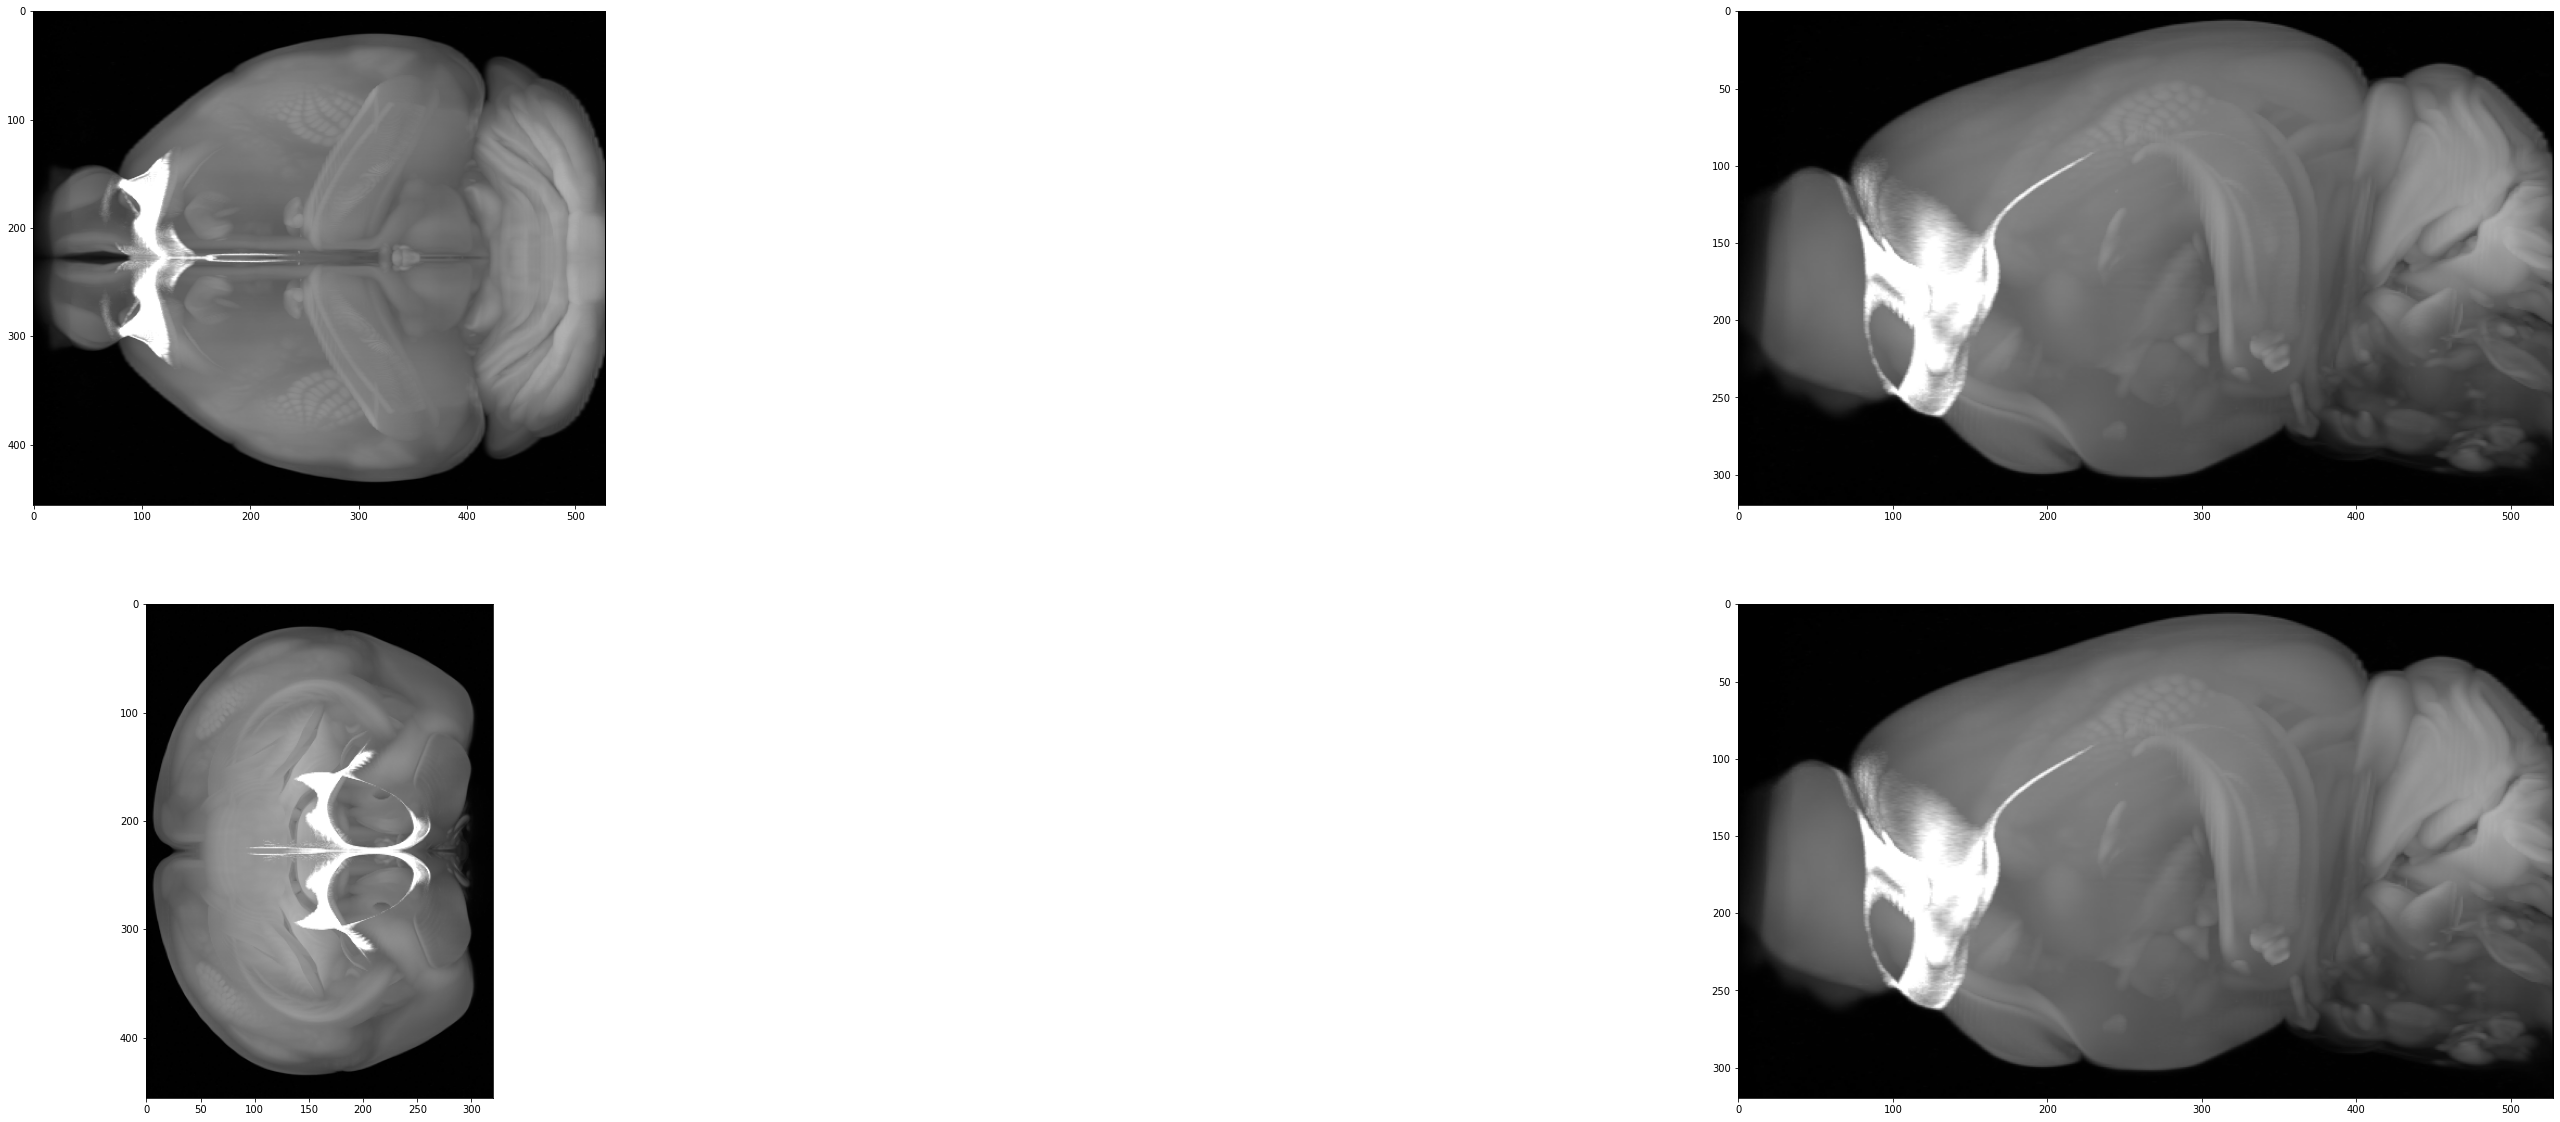

In [2]:
image = load_image('../assets/average_template_25_u8_xpad.v3draw')[:,:,:,20:-20]
template = np.zeros((list(image.shape[1:])+[4]))
template[:,:,:,0] = image[0]
template[:,:,:,1] = image[0]
template[:,:,:,2] = image[0]
template[:,:,:,3] = 255
template = template.astype(np.uint8)
print(template.shape)

fig,ax = plt.subplots(2,2,figsize=(60,20))
ax[0,0].imshow(template.max(axis=1))
ax[0,1].imshow(template.max(axis=0))
ax[1,0].imshow(template.max(axis=2))
plt.savefig('slice0.png')

plts = template.max(axis=0)
print(plts.shape)

ax[1,1].imshow(plts)

(320, 528)


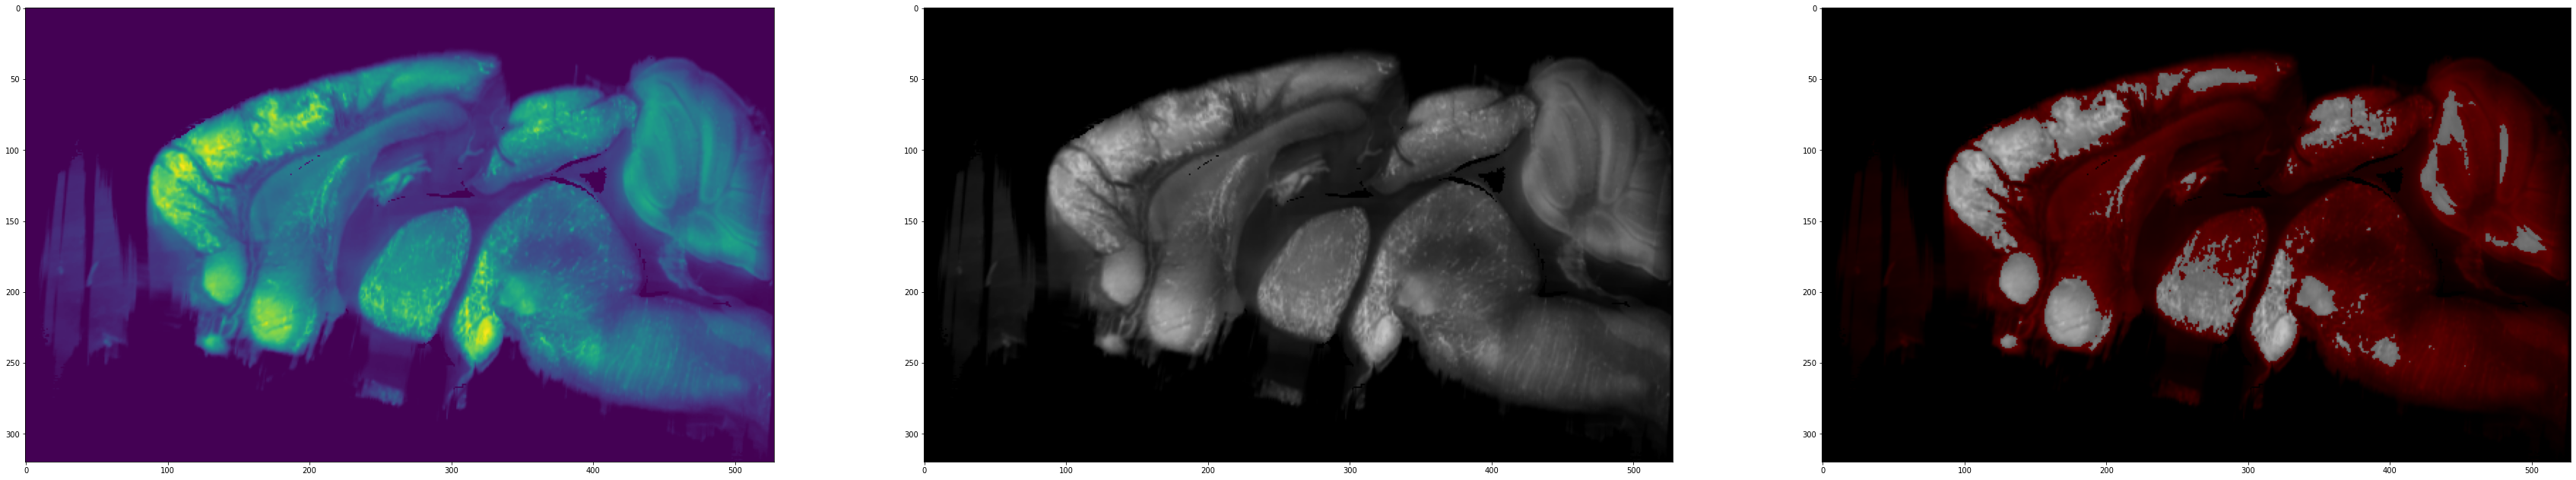

In [3]:
image = load_image('../fig1aexample/register_removed/194069_local_registered_image.tiff')[228,:,:]
print(image.shape)
image = yflix(image)
image = image.astype(np.uint8)
fig,ax = plt.subplots(1,3,figsize=(60,20))
ax[0].imshow(image)

index = abs((image.astype(int)-50))<50

array = np.zeros((list(image.shape)+[4]))
array[:,:,0] = image
array[:,:,1] = image
array[:,:,2] = image
array[:,:,3] = 255
array = array.astype(np.uint8)
ax[1].imshow(array)

array[index,0] = image[index]
array[index,1] = 0
array[index,2] = 0
ax[2].imshow(array)

(320, 528, 4)


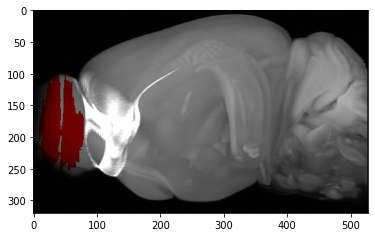

In [4]:
plot = plts.copy()
print(plot.shape)
index[:,80:] = False
plot[index,0] = plts[index,0]
plot[index,1] = 0
plot[index,2] = 0
plt.imshow(plot)
plt.savefig('194069_zeng_fmost.png',dpi=300)

(320, 528)


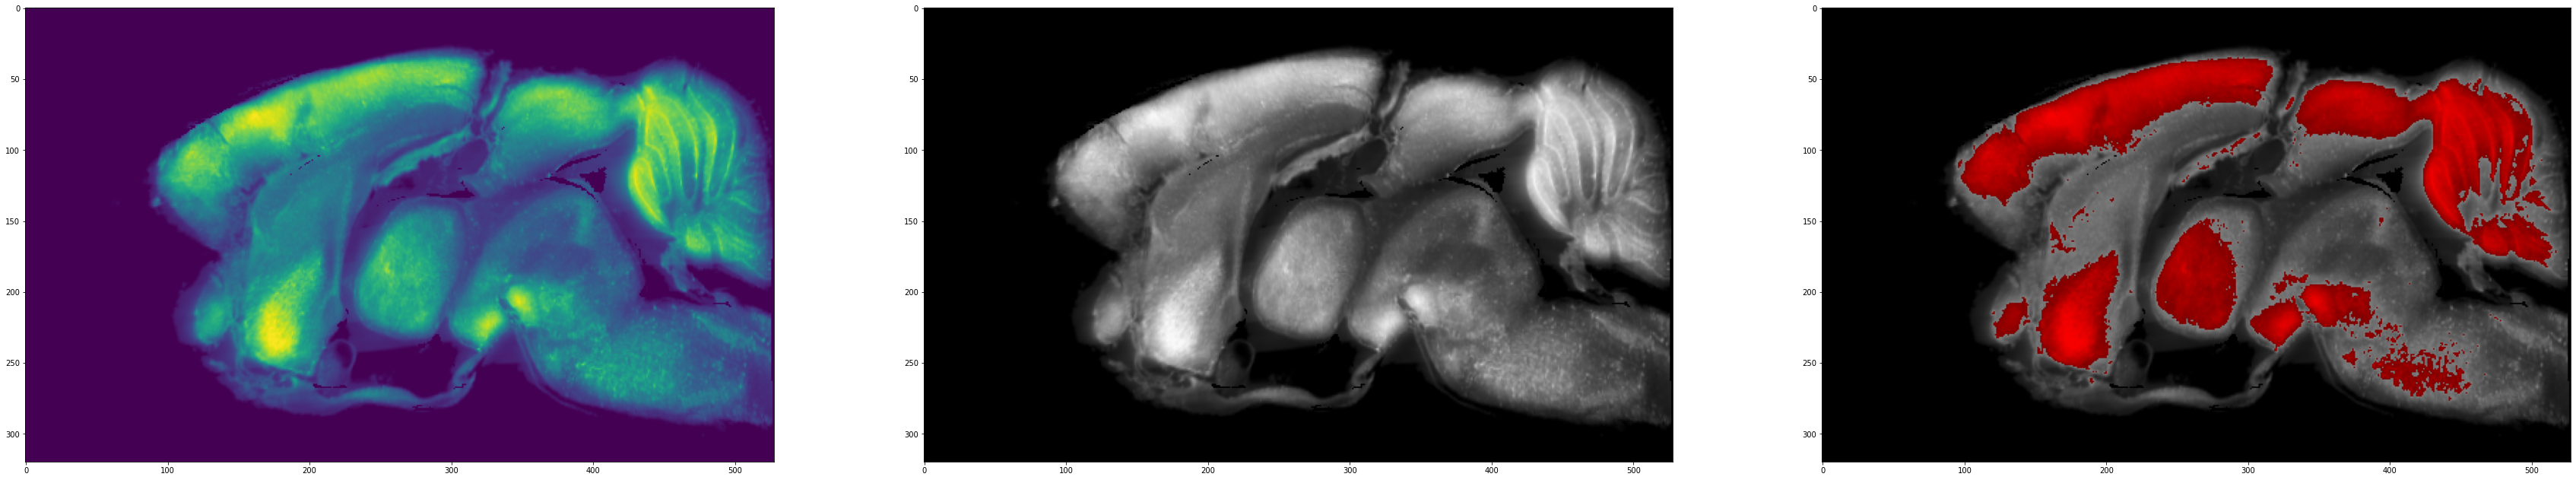

In [5]:
image = load_image('../fig1aexample/register_removed/190891_local_registered_image.tiff')[228,:,:]
print(image.shape)
image = yflix(image)
image = image.astype(np.uint8)
fig,ax = plt.subplots(1,3,figsize=(60,20))
ax[0].imshow(image)

index = abs((image.astype(int)-190))<65

array = np.zeros((list(image.shape)+[4]))
array[:,:,0] = image
array[:,:,1] = image
array[:,:,2] = image
array[:,:,3] = 255
array = array.astype(np.uint8)
ax[1].imshow(array)

array[index,0] = image[index]
array[index,1] = 0
array[index,2] = 0
ax[2].imshow(array)

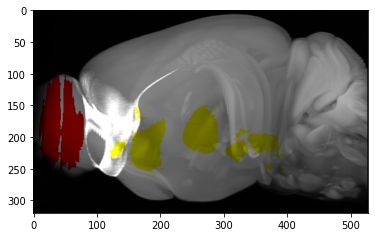

In [6]:
# plot = plts.copy()
# print(plot.shape)
index[:150,:] = False
index[:,395:] = False
plot[index,0] = plts[index,0]
plot[index,1] = plts[index,1]
plot[index,2] = 0
plt.imshow(plot)
plt.savefig('190891_huang_fmost.png',dpi=300)

(320, 528)


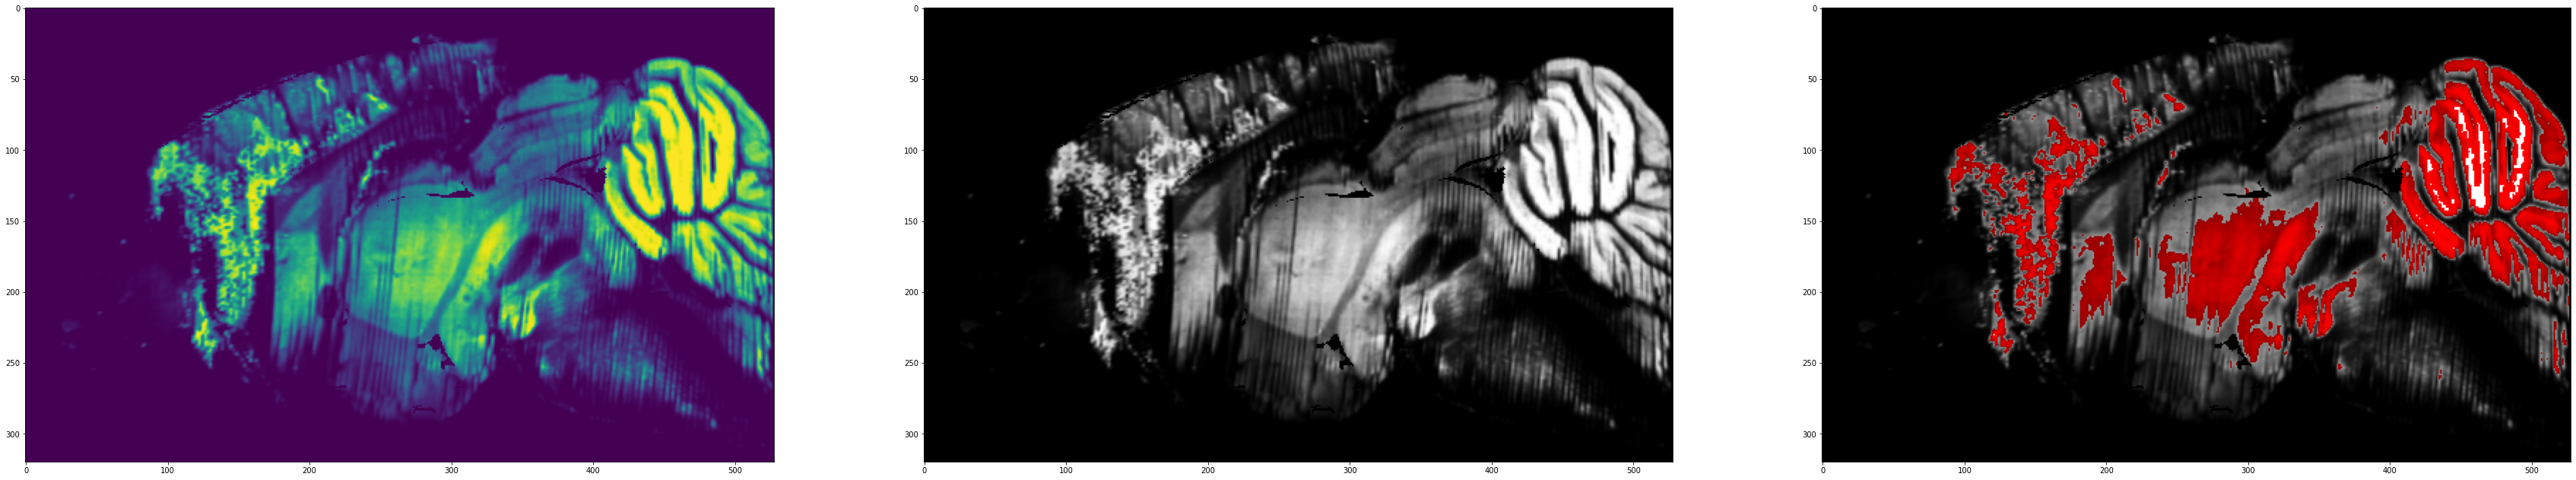

In [7]:
image = load_image('../fig1aexample/register_removed/190827_local_registered_image.tiff')[228,:,:]
print(image.shape)
image = yflix(image)
image = image.astype(np.uint8)
fig,ax = plt.subplots(1,3,figsize=(60,20))
ax[0].imshow(image)

index = abs((image.astype(int)-200))<55

array = np.zeros((list(image.shape)+[4]))
array[:,:,0] = image
array[:,:,1] = image
array[:,:,2] = image
array[:,:,3] = 255
array = array.astype(np.uint8)
ax[1].imshow(array)

array[index,0] = image[index]
array[index,1] = 0
array[index,2] = 0
ax[2].imshow(array)

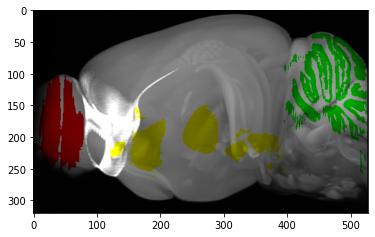

In [8]:
# plot = plts.copy()
# print(plot.shape)
index[:,:395] = False
plot[index,0] = 0
plot[index,1] = plts[index,1]
plot[index,2] = 0
plt.imshow(plot)
plt.savefig('190827_huang_stpt.png',dpi=300)

(320, 528)


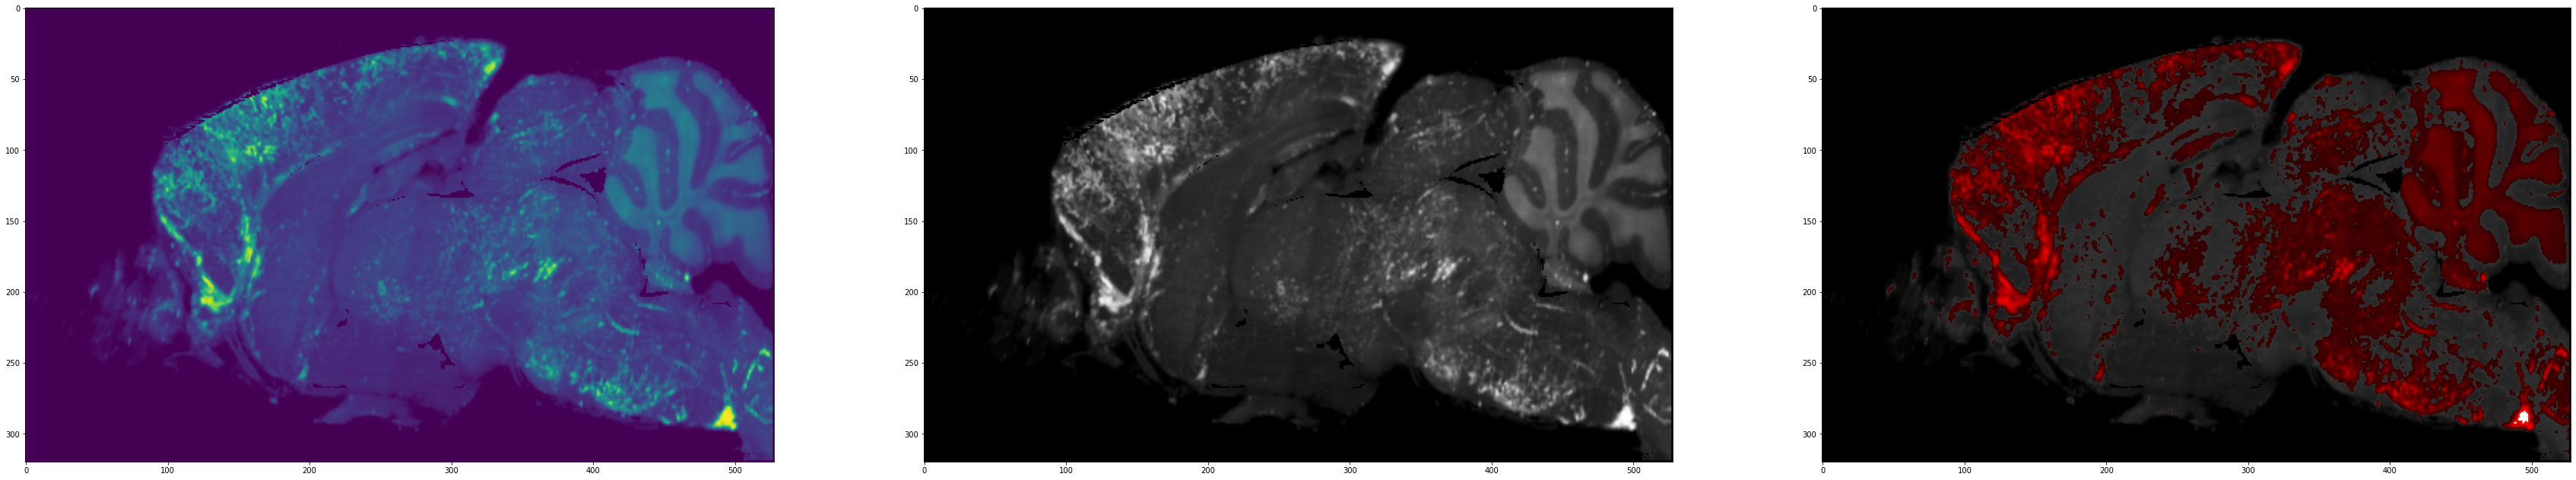

In [9]:
image = load_image('../fig1aexample/register_removed/WHOLE_mouse_Brain_AZ10_SR3B_6_A_647_local_registered_image.tiff')[228,:,:]
print(image.shape)
image = yflix(image)
image = image.astype(np.uint8)
fig,ax = plt.subplots(1,3,figsize=(60,20))
ax[0].imshow(image)

index = abs((image.astype(int)-150))<100

array = np.zeros((list(image.shape)+[4]))
array[:,:,0] = image
array[:,:,1] = image
array[:,:,2] = image
array[:,:,3] = 255
array = array.astype(np.uint8)
ax[1].imshow(array)

array[index,0] = image[index]
array[index,1] = 0
array[index,2] = 0
ax[2].imshow(array)

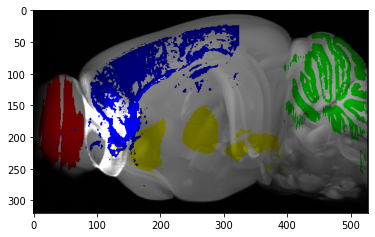

In [10]:
# plot = plts.copy()
# print(plot.shape)
index[130:,180:] = False
index[:,325:] = False
plot[index,0] = 0
plot[index,1] = 0
plot[index,2] = plts[index,2]
plt.imshow(plot)
plt.savefig('647_wu_lsfm.png',dpi=300)

(320, 528)


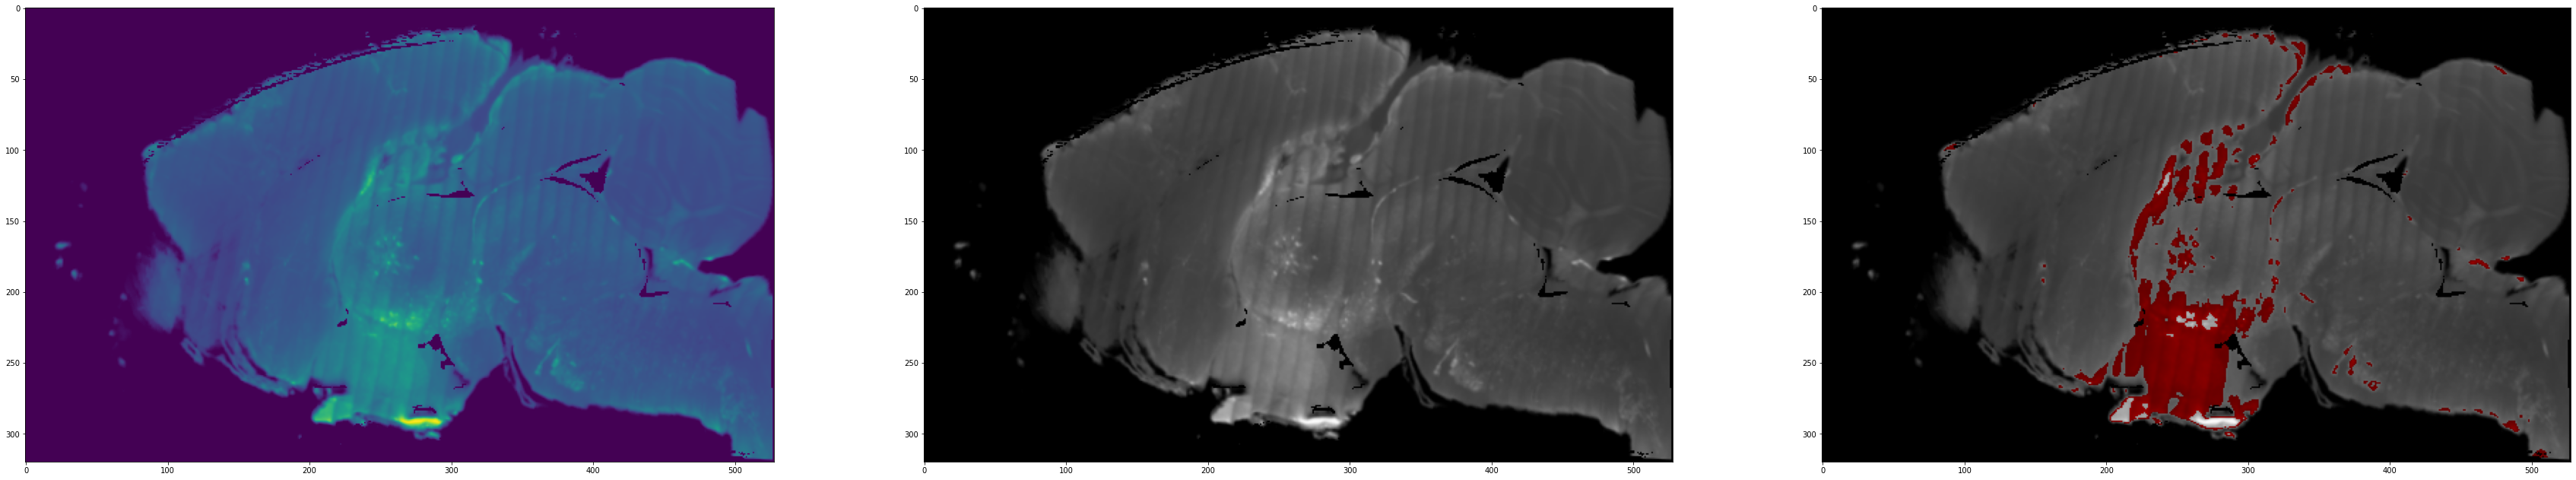

In [11]:
image = load_image('../fig1aexample/register_removed/A3_16um_final_local_registered_image.tiff')[228,:,:]
print(image.shape)
image = yflix(image)
image = image.astype(np.uint8)
fig,ax = plt.subplots(1,3,figsize=(60,20))
ax[0].imshow(image)

index = abs((image.astype(int)-125))<25

array = np.zeros((list(image.shape)+[4]))
array[:,:,0] = image
array[:,:,1] = image
array[:,:,2] = image
array[:,:,3] = 255
array = array.astype(np.uint8)
ax[1].imshow(array)

array[index,0] = image[index]
array[index,1] = 0
array[index,2] = 0
ax[2].imshow(array)

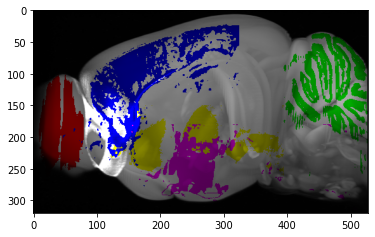

In [12]:
# plot = plts.copy()
# print(plot.shape)
index[:180,:] = False
plot[index,0] = plts[index,0]
plot[index,1] = 0
plot[index,2] = plts[index,2]
plt.imshow(plot)
plt.savefig('A3_osten_lsfm.png',dpi=300)

(320, 528)


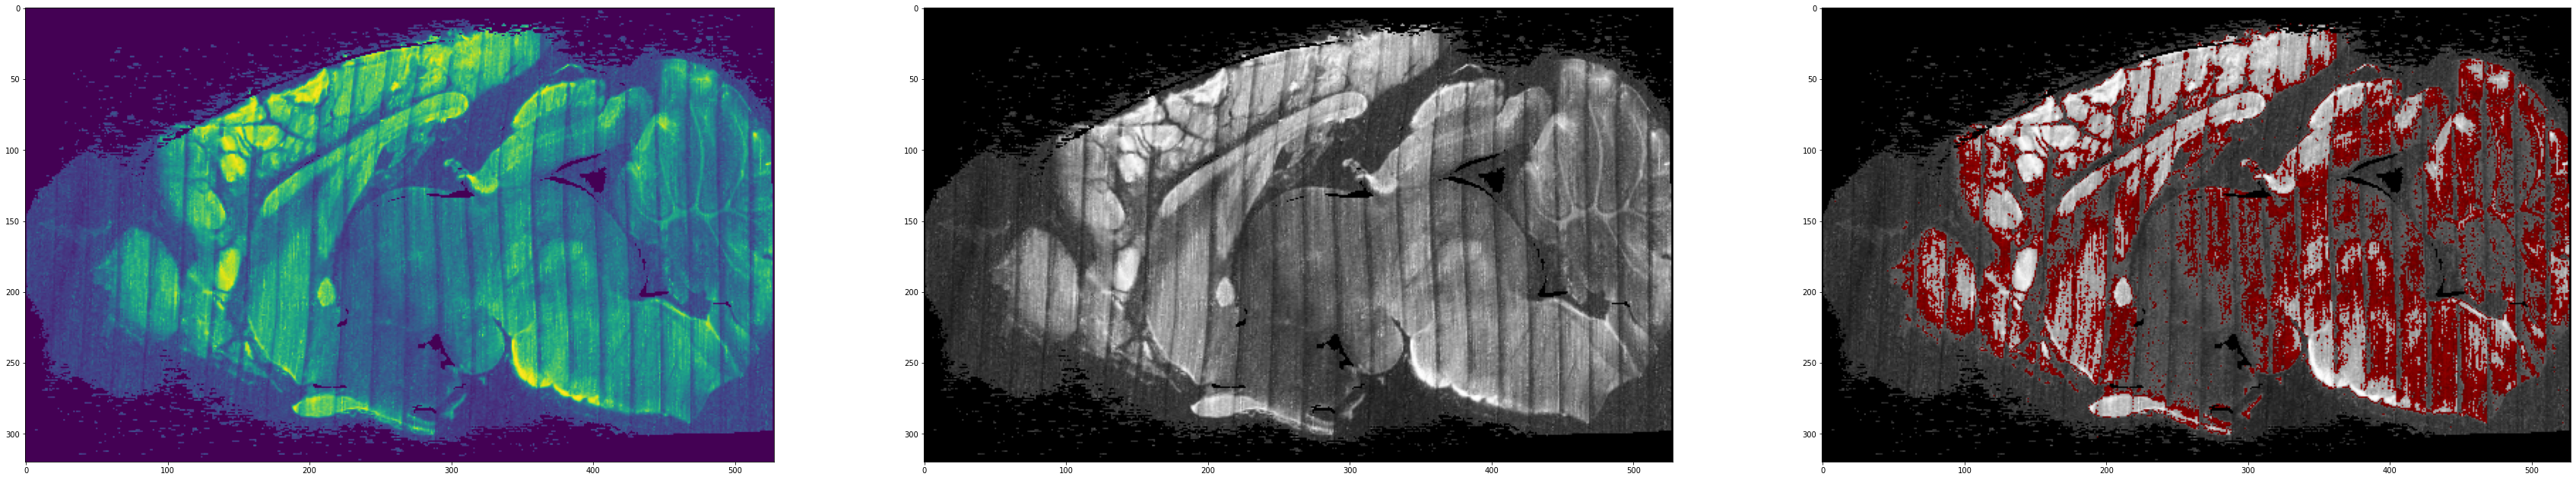

In [13]:
image = load_image('../fig1aexample/register_removed/Ex_642_Em_680_local_registered_image.tiff')[228,:,:]
print(image.shape)
image = yflix(image)
image = image.astype(np.uint8)
fig,ax = plt.subplots(1,3,figsize=(60,20))
ax[0].imshow(image)

index = abs((image.astype(int)-125))<25
# index = abs(image[0]-180)<=30#20
# for i in range(index.shape[0]):
#     for j in range(index.shape[1]):
#         for k in range(index.shape[2]):
#             if not index[i,j,k]: continue
#             try:
#                 index[i-4:i+4,j+4:j+4,k-4:k+4] = True
#             except:
#                 continue

array = np.zeros((list(image.shape)+[4]))
array[:,:,0] = image
array[:,:,1] = image
array[:,:,2] = image
array[:,:,3] = 255
array = array.astype(np.uint8)
ax[1].imshow(array)

array[index,0] = image[index]
array[index,1] = 0
array[index,2] = 0
ax[2].imshow(array)




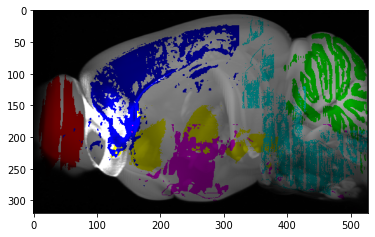

In [14]:
# plot = plts.copy()
# print(plot.shape)
index[:155,:330] = False
index[155:,:360] = False
index[:190,430:] = False
index[:120,380:] = False
plot[index,0] = 0
plot[index,1] = plts[index,1]
plot[index,2] = plts[index,2]
plt.imshow(plot)
plt.savefig('A3_osten_lsfm.png',dpi=300)